In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 200
appendage = "_time"

estimates = pd.read_csv("estimates" + appendage + ".csv")
estimates = estimates.rename({"Unnamed: 0":"variable"}, axis=1)
estimates["var"] = estimates["std"] ** 2
estimates

,variable,estimate,std,var
0,(Intercept),-37.825083,0.399336,0.159469
1,algoexponential,-0.771000,0.130476,0.017024
2,algoPER,-1.046667,0.127331,0.016213
3,algoPER-v2,-0.146667,0.127331,0.016213
4,algoproportional,-0.099333,0.113889,0.012971
5,log(frame),2.328015,0.019903,0.000396
6,mem_size16,-0.754333,0.164794,0.027157
7,mem_size2,-0.136000,0.113889,0.012971
8,mem_size4,-0.292667,0.113889,0.012971
9,mem_size6,-0.276000,0.113889,0.012971


In [12]:
from functools import partial


x = [1,2,4,6,8, 16, 64]
algo_mem_sizes = {"default": [1,2,4,6,8],  
"algoexponential": [1,2,4,6,8], 
"algoproportional": [1,2,4,6,8],  
"algoPER": [4,6,8,16,64], 
"algoPER-v2": [2, 4, 8, 16]}

def mem_effect(x, metric): 
    if len(estimates.loc[estimates["variable"] == "mem_size" + str(x), metric].values) <= 0:
        return 0
    else:
        return estimates.loc[estimates["variable"] == "mem_size" + str(x), metric].values[0] 
    
def algo_effect(algo, metric):
    if len(estimates.loc[estimates["variable"] == algo, metric]) <= 0:
        return 0 
    else:
        return estimates.loc[estimates["variable"] == algo, metric].values[0]

def interaction_effect(algo, size, metric):
    if len(estimates.loc[estimates["variable"] == algo+":mem_size"+str(size), metric]) <= 0:
        return 0 
    else:
        return estimates.loc[estimates["variable"] == algo+":mem_size"+str(size), metric].values[0]

p = partial(mem_effect, metric="estimate")
a = list(map(p, x))
p_var = partial(mem_effect, metric="var")
a_var= list(map(p_var, x))

algos = ["default",  "algoexponential",  "algoPER", "algoproportional", "algoPER-v2"]
algo_names = ["default", "exponential", "PER", "proportional", "PER-v2"]

result = {}
for algo, algo_name in zip(algos, algo_names):
    if algo == "default":
        result[algo_name] = [a[:len(algo_mem_sizes["default"])+1], a_var[:len(algo_mem_sizes["default"])+1]]
    else:
        res = []
        res_var = []

        for size in x:
            if size in algo_mem_sizes[algo]:
                total_effect = algo_effect(algo, metric="estimate") + interaction_effect(algo, size, metric="estimate")
                total_effect_var = algo_effect(algo, metric="var") + interaction_effect(algo, size, metric="var")

                res.append(total_effect) 
                res_var.append(total_effect_var)

        result[algo_name] = [[i+j for i,j in zip(a, res)], [i+j for i,j in zip(a_var, res_var)]]


result["default"][0] = result["default"][0][:-1]
result["default"][1] = result["default"][1][:-1]
result

{'default': [[0,
   -0.136000000000004,
   -0.292666666666661,
   -0.276000000000006,
   0.633999999999976],
  [0,
   0.012970610048043202,
   0.012970610048043658,
   0.012970610048043202,
   0.01297061004804343]],
 'exponential': [[-0.770999999999987,
   -0.450999999999987,
   -0.22099999999998204,
   0.220666666666677,
   -1.0526666666666542],
  [0.01702392568805722,
   0.06728503962422547,
   0.06728503962422593,
   0.06323172398421145,
   0.06323172398421206]],
 'PER': [[-0.08833333333342697,
   -1.329333333333437,
   -1.339333333333381,
   0.35899999999989407,
   -0.6826666666667628],
  [0.05269310332018004,
   0.06161039772820985,
   0.029183872608101465,
   0.059583739908202454,
   0.06161039772820972]],
 'proportional': [[-0.0993333333332032,
   -0.3959999999998862,
   -1.9693333333332141,
   -1.1059999999998862,
   -2.1993333333332177],
  [0.01297061004804753,
   0.055125092704188625,
   0.05512509270418942,
   0.05512509270418794,
   0.055125092704188514]],
 'PER-v2': [[-0.2

default ['1', '2', '4', '6', '8'] [0, -0.136000000000004, -0.292666666666661, -0.276000000000006, 0.633999999999976]
exponential ['1', '2', '4', '6', '8'] [-0.770999999999987, -0.450999999999987, -0.22099999999998204, 0.220666666666677, -1.0526666666666542]
PER ['4', '6', '8', '16', '64'] [-0.08833333333342697, -1.329333333333437, -1.339333333333381, 0.35899999999989407, -0.6826666666667628]
proportional ['1', '2', '4', '6', '8'] [-0.0993333333332032, -0.3959999999998862, -1.9693333333332141, -1.1059999999998862, -2.1993333333332177]
PER-v2 ['2', '4', '8', '16'] [-0.250000000000005, -0.774333333333353, -0.43933333333330704, -0.422666666666652]


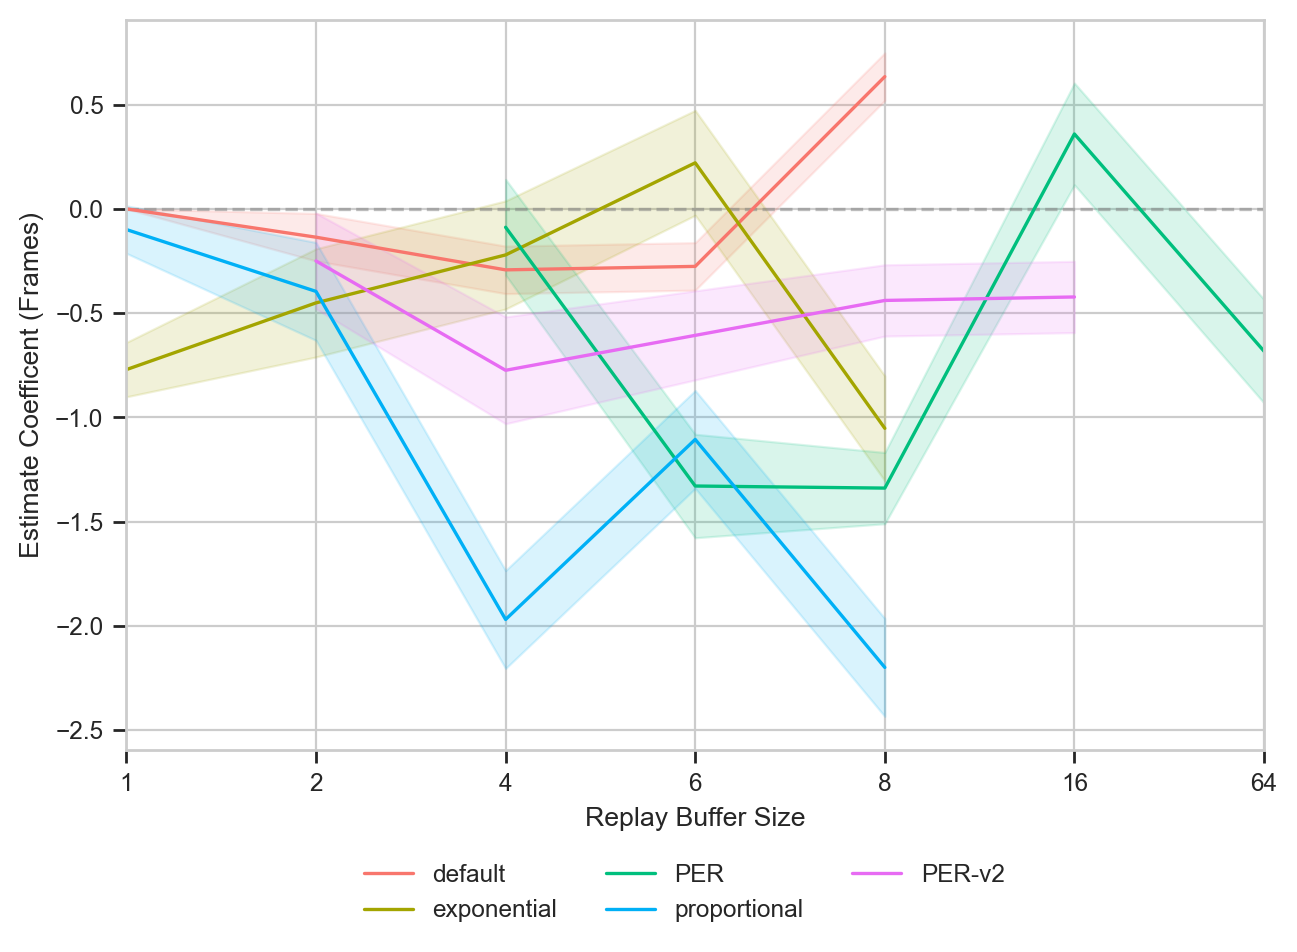

In [13]:
import seaborn as sns



def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.style.use('seaborn-whitegrid')

sns.set_context("paper", font_scale = 1)

palette = sns.color_palette("colorblind", 5)[:2]
colors = ("#F8766D", "#A3A500", "#00BF7D", "#00B0F6", "#E76BF3")

ax = sns.lineplot(x=range(len(x)), y=[0,0,0,0,0, 0,0], color="grey", alpha=0.5, linestyle="dashed")
for color, (algo_name, (v, v_var)), algo in zip(colors, result.items(), algos):
    mems = algo_mem_sizes[algo]
    mems = [str(x) for x in mems]
    v_sd = [var ** 0.5 for var in v_var]
    print(algo_name, mems, v)
    sns.lineplot(x=mems, y=v, label=algo_name, color=color)
    ax.fill_between(mems, [m-sd for m,sd in zip(v, v_sd)], [m+sd for m,sd in zip(v, v_sd)], alpha=0.15, color=color)

legend_without_duplicate_labels(ax)


plt.xlim(0, 5)
plt.xticks(ticks=range(len([1,2,4,6,8,16,64])), labels=[1,2,4,6,8,16,64])
plt.tight_layout()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.legend(bbox_to_anchor=(0.2, -0.25), loc="lower left", borderaxespad=0., ncol=3)

if appendage == "_time":
    plt.ylabel("Estimate Coefficent (Time)")
else:
    plt.ylabel("Estimate Coefficent (Frames)")

plt.xlabel("Replay Buffer Size")
plt.savefig("coefplot" + appendage + ".png", dpi=300, bbox_inches = "tight") 

plt.show()


In [10]:

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
import seaborn.timeseries
import numpy as np

def _plot_std_bars(*args, central_data=None, ci=None, data=None, **kwargs):
    std = data.std(axis=0)
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_bars(*args, **kwargs)

def _plot_std_band(*args, central_data=None, ci=None, data=None, **kwargs):
    std = data.std(axis=0)
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_std_bars = _plot_std_bars
seaborn.timeseries._plot_std_band = _plot_std_band

In [ ]:
ax = sns.tsplot(x=, err_style="std_bars", n_boot=0)
